In [36]:
# Symbolic math package
import sympy as sp
sp.init_printing()
# Custom convenience function
from sympyutils import show
# Matlab-like package
import numpy as np
# Plotting
import matplotlib.pyplot as plt
%matplotlib inline
# Custom plotting options
import matplotopts
matplotopts.custom()

# Angled flow past cylinder with Backspin<sup>TM</sup>

This kind of flow is obtained by combining a vortex centered at the origin as well as angled flow past a cylinder.

## Stream Function
As shown in the handwritten notes, the stream function is given by:
\begin{align}
\Psi &= \Psi_{CWAF} + \Psi_{vortex} + C\\
 \text{where} \quad\Psi_{CWAF} &= U\big[r - \frac{a^2}{r}\big]\sin(\theta - \alpha)\\
 \Psi_{vortex} &= \frac{\Gamma}{2\pi}\log(r)
\end{align}
notice that we added a constant $C$. We'll use this for convenience to make the value of the stream function around the cylinder to be equal to 0. In other words:
\begin{gather}
\text{Find}~C ~\text{such that}~ \Psi\big|_{r=a} = 0\\
\Psi\big|_{r=a} = \frac{\Gamma}{2\pi}\log(a) + C = 0 \quad\Rightarrow\quad C = -\frac{\Gamma}{2\pi}\log{a}
\end{gather}
We can then write our new stream function as:
$$
\Psi = U\left[r - \frac{a^2}{r}\right]\sin(\theta - \alpha) + \frac{\Gamma}{2\pi}\log\left(\frac{r}{a}\right)
$$

## Velocity

The $r$ and $\theta$ components of the velocity are found like so:
\begin{align}
u_r &= \frac{1}{r}\frac{\partial\Psi}{\partial\theta}\\
u_\theta &= -\frac{\partial\Psi}{\partial r}
\end{align}

We're going to use the **sympy** package from now on.

In [37]:
U, r, a, theta, alpha, gam = sp.symbols('U r a theta alpha Gamma', real=True, positive=True)
psi_cwaf = U*(r - a**2/r)*sp.sin(theta - alpha)
psi_vortex = gam/(2*sp.pi)*sp.log(r/a)
psi = psi_cwaf + psi_vortex
show(psi, '\Psi')

<IPython.core.display.Math object>

Sometimes **sympy** does weird stuff, but the expression is the same as above. 

In [38]:
ur = (1/r)*sp.diff(psi, theta)
ut = -sp.diff(psi, r)
show(ur, 'u_r')

<IPython.core.display.Math object>

In [39]:
show(ut, 'u_{\\theta}')

<IPython.core.display.Math object>

Let's also find the values of the velocity at the surface of the cylinder. This will be useful later. 

In [40]:
surface = [(r, a)]
ur_surface = ur.subs(surface)
show(ur_surface, 'u_r\\big|_{r=a}')

<IPython.core.display.Math object>

In [41]:
ut_surface = ut.subs(surface)
show(ut_surface, 'u_\\theta\\big|_{r=a}')

<IPython.core.display.Math object>

## Stagnation Points

We now seek the stagnation points for this flow. We expect that, for low enough $\Gamma$, the stagnation points will be located on the surface of the cylinder. This simplifies our task since, as shown above, $u_r$ is zero at the surface. Let's ask **sympy** to solve for the value of $\theta$ at stagnation points.

In [42]:
tstag = sp.solve(ut_surface, theta)
show(tstag, '\\theta_{s}')

<IPython.core.display.Math object>

Let's perform a *sanity check*: we expect $\theta_{s}\big|_{\Gamma = \alpha = 0} = \{0, \pi\}$.

In [43]:
hnbs = [(gam, 0), (alpha, 0)]  # Conditions for horizontal flow without backspin
show(
    [x.subs(hnbs) for x in tstag], 
    '\\theta_{s}\\big|_{\\Gamma = \\alpha = 0}'
)

<IPython.core.display.Math object>

Cool. Let's see how $\Gamma$ affects $\theta_s$ now. It's easier to non-dimensionalize $\Gamma$ and write $\theta_s$ as:
$$
\theta_s = \left\{\alpha - \operatorname{asin}\left(\chi\right), \alpha + \operatorname{asin}\left(\chi\right) - \pi\right\}
$$

Let's plot this!

In [44]:
CHI = np.linspace(0, 2, 201)
TSTAG = [-np.arcsin(CHI), np.arcsin(CHI) - np.pi]

/home/selimb/miniconda/envs/science/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in arcsin
  from ipykernel import kernelapp as app


What just happened? Well **numpy** is complaining because there is no real solution for $\operatorname{asin}(\chi), ~\chi > 1$. Let's ignore this for now.

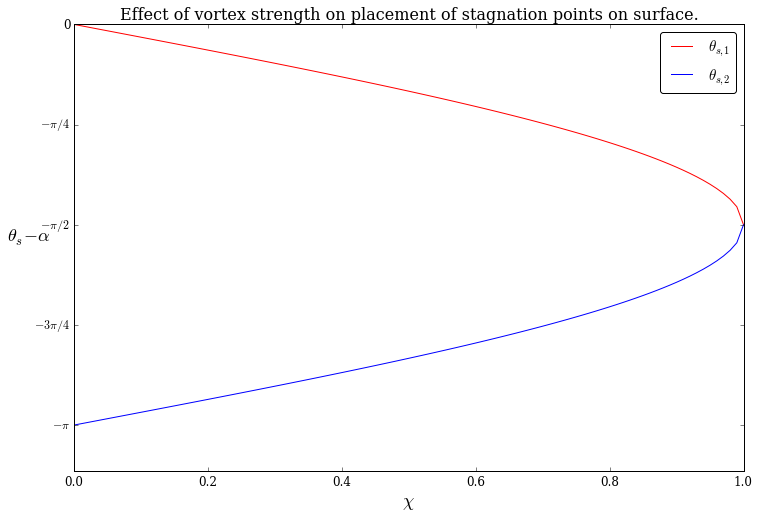

In [45]:
# matplotlib.rcParams.update(matplotlib.rc_params_from_file('matplotlibrc'))
# print(matplotlib.rcParams)
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(CHI, TSTAG[0], 'r', label='$\\theta_{s,1}$')
ax.plot(CHI, TSTAG[1], 'b', label='$\\theta_{s,2}$')
ax.set_xlabel('$\\chi$')
ax.set_ylabel('$\\theta_s - \\alpha$', rotation=0)
ax.legend(fancybox=True, loc='best')
# Beautiful y axis
yticks = np.linspace(0, 1, 5)*-np.pi
ax.set_yticks(yticks)
ax.set_yticklabels(['0', '$-\\pi/4$', '$- \\pi/2$', '$- 3\\pi/4$', '$- \\pi$'])
ax.set_title('Effect of vortex strength on placement of stagnation points on surface.')
plt.show()

This confirms what we saw in class: the stagnation points move symmetrically towards the "bottom" of the cylinder, at which point there is but one stagnation point.

But, what happens when $\chi > 1$? Well, we made an assumption earlier that the stagnation points would be on the cylinder! As we see here, that assumption breaks down for large enough $\Gamma$. To find the expression for these stagnation points, we require some intuition. 

Let $r > a$, let's start by finding $\theta_s = \left\{\theta ~\big| ~u_r = 0\right\} $

In [46]:
ts = sp.solve(ur, theta)
show(ts, '\\theta_s')

<IPython.core.display.Math object>

This is what we obtained in class -- without the $\alpha$ and with positive angles.

Now let's find $r_s = \left\{r ~\big| ~u_\theta\big|_{\theta=\theta_s} = 0\right\} $

In [47]:
rs = [sp.solve(ut.subs(theta, t), r, simplify=True) for t in ts]
show(rs, 'r_s')

<IPython.core.display.Math object>

Nasty. Alright now let's plug in $\Gamma = 2\cdot(4\pi U a)$ and see which ones satisfy $\dfrac{r_s}{a} > 1$.

In [48]:
rs2 = [r.subs(gam, 2*(4*sp.pi*U*a)).simplify() 
       for rpair in rs for r in rpair]
show(rs2, 'r_s\\big|_{\chi=2}')

<IPython.core.display.Math object>

In [49]:
valid = [sp.Gt(r/a, 1) for r in rs2]
valid

So the only valid answer is the very last expression.

In [50]:
rsvalid = rs[1][1]
show(rsvalid, 'r_s')

<IPython.core.display.Math object>

Note that it does not depend on $\alpha$, as that would be ridiculous. However, $\theta_s$ *does* depend on $\alpha$.

Just for fun, let's see what that plot looks like. Again, we non-dimensionalize $\Gamma$ with the following:
$$
\chi = \frac{\Gamma}{4\pi U a}
$$
and we don't really care about the actual value of $a$, so really we seek an expression
$$
R(\chi) = \frac{r_s}{a}
$$

In [51]:
chi = sp.symbols('chi')
chisub = [(gam, chi*4*sp.pi*U*a)]
R = (rsvalid.subs(chisub)/a).simplify()
show(R, 'R')

<IPython.core.display.Math object>

Awesome expression, don't you think? Let's plot this just for the hell of it.

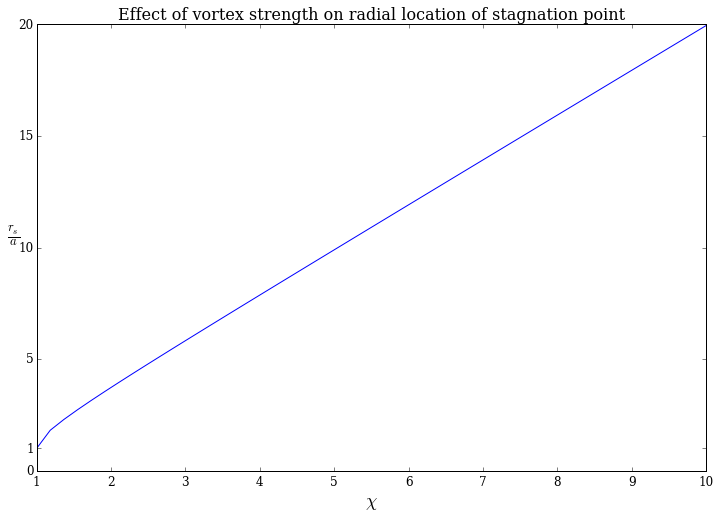

In [52]:
fig, ax = plt.subplots(figsize=(12, 8))
CHI = np.linspace(1, 10)
Rvals = CHI + np.sqrt(CHI**2 -1)
R0 = Rvals[0]
ax.plot(CHI, Rvals)
ax.set_xlabel('$\\chi$')
ax.set_ylabel('$\\frac{r_s}{a}$', rotation=0)
yticks = ax.get_yticks()
yticks = np.append(yticks, Rvals[0])
ax.set_yticks(yticks)
ax.set_title('Effect of vortex strength on radial location of stagnation point')
plt.show()

## Pressure coefficient

So we found the stagnation points. Cool. Now, let's look for the pressure coefficient $C_P$.

We start by using Bernoulli's equation:
$$
P_\infty + \frac{1}{2}\rho U^2 = \left(P + \frac{1}{2}\rho \vec{u}\cdot \vec{u}\right)_{surface}\\
\Rightarrow P_{surface} = P_{t,\infty} - \left(\frac{1}{2}\rho \vec{u}\cdot \vec{u}\right)_{surface}
$$
where $P_{t,\infty}$ is the *total* freestream pressure. Luckily, we already found $\vec{u}_{surface}$:
\begin{align}
\vec{u}_{surface} &= \left[u_r\hat{e}_r + u_\theta\hat{e}_\theta\right]\big|_{r = a}\\
 &= 0\hat{e}_r + \left(2U\sin(\alpha−\theta) − \frac{\Gamma}{2\pi a}\right)\hat{e}_\theta
\end{align}
Thus, 
\begin{align}
\left(\vec{u}\cdot \vec{u}\right)_{surface} = \left(u_\theta\big|_{r=a}\right)^2
\end{align}

In [18]:
uusurf = ut_surface**2
show(uusurf.expand(), r'\left(\vec{u}\cdot \vec{u}\right)_{surface}')

<IPython.core.display.Math object>

In [19]:
p, rho, pinf = sp.symbols('P rho P_{\infty}', real=True, positive=True)
p = pinf + (rho/2)*U**2 - (rho/2)*uusurf
show(p, 'P')

<IPython.core.display.Math object>

Now, the pressure coefficient is defined as:
$$
C_P = \frac{P - P_\infty}{\frac{1}{2}\rho U^2}
$$
So in our case:

In [20]:
cp = 2*(p - pinf)/(rho*U**2)
show(cp.simplify(), 'C_p')

<IPython.core.display.Math object>

This is not as pretty as we'd like. Let's see what happens if we non-dimensionalize $\Gamma$ with $\chi$ again.

In [21]:
cpchi = cp.subs(chisub).simplify()
show(cpchi, 'C_p')

<IPython.core.display.Math object>

Magnificient.

Now onto $C_L$ and $C_D$. 

## Lift and Drag

To figure out the lift and drag, we first need to find $F_x$ and $F_y$. We already have an expression for $P_{surface}$, so what is required is to integrate the pressure around the cylinder. More explicitly:
\begin{align}
F_x &= -\int_0^{2\pi} P a \cos(\theta) \text{d}\theta\\
F_y &= -\int_0^{2\pi} P a \sin(\theta) \text{d}\theta
\end{align}
$P$ is quite a big expression. We could simplify it by hand, since we're pros of trig integrals and know which terms will drop out, but **sympy** gladly does the heavy lifting for us in this case.

In [22]:
Fx = -sp.integrate(p*a*sp.cos(theta), (theta, 0, 2*sp.pi)).simplify()
Fy = -sp.integrate(p*a*sp.sin(theta), (theta, 0, 2*sp.pi)).simplify()

In [23]:
show(Fx, 'F_x')

<IPython.core.display.Math object>

In [24]:
show(Fy, 'F_y')

<IPython.core.display.Math object>

This agrees with what we derived in class for $\alpha = 0$. Thank god. 

Now, $C_L$ and $C_D$, the coefficients of lift and drag, are defined in two-dimensions as:
\begin{align}
C_L = \frac{L}{\frac{1}{2}\rho U^2 s}\\
C_D = \frac{D}{\frac{1}{2}\rho U^2 s}
\end{align}
where $s$ is the reference area -- the area projected in the flow direction -- per unit span, $L$ is the lift force and $D$ is the drag force. For a cylinder, $s = 2a$. 

If we define $L$ as the force in y-direction and $D$ as the force in the x-direction, then we get the following, again using our trusty $\chi$:

In [25]:
s = 2*a
denom = (rho*U**2*s)/2
Cl = (Fy/denom).subs(chisub).simplify()
Cd = (Fx/denom).subs(chisub).simplify()

In [26]:
show(Cl, 'C_L')

<IPython.core.display.Math object>

In [27]:
show(Cd, 'C_D')

<IPython.core.display.Math object>

Negative Drag? That seems wrong. Well no, as the angle of attack increases, this generates a force in the negative x-direction, i.e. we get thrust for free! Wouldn't that be nice. 

## Conclusion

So there you have it. We've completely analyzed angled flow around cylinder with backspin. The next notebook will use all the tough math we've just been through to generate cool interactive plots. 

----

## Cartesian Stuff

This is only required when we're going to want to plot the streamlines. Skip this section.

We know that $x = r\cos(\theta), y = r\sin(\theta)$. Thus, we can also say that:
\begin{align}
\dot{x} &= \dot{r}\cos(\theta) - r\dot{\theta}\sin(\theta)\\
\dot{y} &= \dot{r}\sin(\theta) + r\dot{\theta}\cos(\theta)
\end{align}
Which means
\begin{align}
u &= u_r\cos(\theta) - r u_\theta \sin(\theta)\\
v &= u_r\sin(\theta) + r u_\theta \cos(\theta)
\end{align}

In [34]:
ones = [(U, 1), (a, 1)]
sub = chisub + ones
u = (ur*sp.cos(theta) - r*ut*sp.sin(theta)).subs(sub).simplify()
v = (ur*sp.sin(theta) + r*ut*sp.cos(theta)).subs(sub).simplify()

In [35]:
print(u)
print(v)

(r*(2*chi*r - (r**2 + 1)*sin(alpha - theta))*sin(theta) + (r**2 - 1)*cos(theta)*cos(alpha - theta))/r**2
(-r*(2*chi*r - (r**2 + 1)*sin(alpha - theta))*cos(theta) + (r**2 - 1)*sin(theta)*cos(alpha - theta))/r**2


In [53]:
psi

False

In [58]:
sp.solve(sp.Eq(psi, 0), theta)

In [56]:
psi